# 面向过程存在的问题

程序由**数据存储和运算**构成

所有的程序都可以用 if else 顺序执行实现……

但是，写代码的人并不开心，太过臃肿

两种解决途径：

- 定义成函数，以运算为中心组织

- 定义成类，以数据为中心组织

In [ ]:
# 人狗大战面向过程实现的架构

# - 多条狗，每个狗有名字，品种，攻击力
# - 可以有多个人 ，
# - 狗可以咬人，人可以打狗


# ----------------------------模板-------------------------
# 攻击力与类型对应好
attack_val = {
    '哈士奇':30,
    '藏獒':80
}

# 定义狗
def dog(name,dog_type):
# 定义人
def person(name,age):
  
# 哪只狗咬了哪个人一口
def dog_bite(dog_obj, person_obj):
  
# 哪个人打了哪个人一下
def beat(person_obj, dog_obj):
 
#----------------------具体的实体-----------------------
d1 = dog('大黄','藏獒')
d2 = dog('小黑','哈士奇')

p1 = person('rc',16)
p2 = person('gy',20)


dog_bite(d1,p1)
beat(p2,d2)


# 这样调用是错误的，但是程序没有报错
# 如何限制实体的能力？比如说dog_bite()这个函数只让狗来调用？
dog_bite(p1,d1)

# 这就需要面向对象了，以数据为中心组织代码

为什么以数据为中心组织？


数据与数据之间不是孤立的，而是有很清晰的关系：比如说某些数据同属于一个类型，张三和李四都是人；比如说某些数据具有一些特定的功能，“制造并使用工具”这个运算是与人这个类型的数据强绑定的。

写成类实际是限定了模块化方法的使用范围

# 面向对象语法

类

对象

属性：每个实例都有自己的位置，用来存信息

方法：存在一个公共的位置，每个实例去调用

## 类的基本语法



```
class 类名: #可以有()也可以没有
  role = "xxx" # 类属性

  def func(self): # 类方法
    函数语句

obj = 类名()
```

In [67]:
### 举例，定义一个Person类
class Person:
  role = 'person'

  def walk(self):
    print('人会走路')

p1 = Person()
print(p1.role)
p2 = Person()
print(p2.role)

person
person


## 怎么让每个实例具有各自不同的属性？

\_\_init__() 构造函数

In [ ]:
### 举例，利用__init__传进去人的名字和年龄
### 举例，定义一个Person类
class Person:
  role = 'person' #类属性

  def __init__(self,name,age):
    self.name = name # 实例属性
    self.age = age

  def walk(self):
    print('人会走路')

p1 = Person('zgy','18')
p2 = Person('syb',12)
print(p1.name)
print(p2.name)

## self是什么？

为什么python的类需要self？不要行不行，既然每个方法的第一个参数都是self，省略不就得了

从 **物理存储地址** 的角度来理解 **类的语法为什么这么设计**

https://colab.research.google.com/drive/10zsS02xJtSCmJcCfBue0PZcm2ruKw65J#scrollTo=em6KBXbb-7wE&line=41&uniqifier=1


In [71]:
### 举例，实例化出两个人，通过id查看公有属性、实例属性、类方法的存储位置
class Person:
  role = 'person' #类属性

  def __init__(self,name,age):
    self.name = name # 实例属性
    self.age = age

  def walk(self):
    print('人会走路')

p1 = Person('zgy','18')
p2 = Person('syb',12)
print(p1.name)
print(p2.name)

print(id(p1.walk))
print(id(p2.walk))

p1.role = 'unknown'
print(p1.role)
print(p2.role)
print(Person.role)

# 类属性存储在相同的位置

# 方法存在相同的位置

# 实例属性存在不同的位置

# 通过实例对类属性进行修改，不会影响其他实例，实际上相当于创建了一个新的实例属性

zgy
syb
140409403940528
140409403940528
unknown
person
person


因为类方法存储在相同的位置，所以需要self来将实例自身传给类方法，告诉类方法，是谁在调用该方法

实际上相当于执行了:
p.walk(p)，p自动赋值给第一个参数，通常是写成self

https://pythontutor.com/

一步步执行看一下是怎么分配数据存储的

## 人狗大战的面向对象实现

In [73]:
class Dog: # 定义一个狗类
  role = 'dog' # 狗的角色属性都是狗

  def __init__(self, name, breed, attack_val):
    self.name = name
    self.breed = breed # 每一只狗都有自己的品种;
    self.attack_val = attack_val # 每一只狗都有自己的攻击力;
    self.life_val = 100 # 每一只狗都有自己的生命值;

  def bite(self, person):
    # 狗可以咬人，这里传递进来的person也是一个对象。
    person.life_val -= self.attack_val # 狗咬人，那么人的生命值就会根据狗的攻击力而下降
    print('狗[%s]咬了人[%s],人掉血[%s],还剩血量[%s]...' % (self.name,person.name,self.attack_val,person.life_val))


class Person: # 定义一个人类
  role = 'person' # 人的角色属性都是人

  def __init__(self, name, sex, attack_val):
    self.name = name
    self.attack_val = attack_val
    self.life_val = 100
    self.sex = sex

  def attack(self,dog):
    # 人可以攻击狗，这里传递进来的dog也是一个对象。
    # 人攻击狗，那么狗的生命值就会根据人的攻击力而下降
    dog.life_val -= self.attack_val
    print('人[%s]打了狗[%s],狗掉血[%s],还剩血量[%s]...' % (self.name,dog.name,self.attack_val,dog.life_val))

d1 = Dog('小黑','二哈',30)
d2 = Dog('大黄','藏獒',80)

p1 = Person('zgy','M',50)
p2 = Person('syb','M',40)


# 两个对象交互
p1.attack(d1)
p1.attack(d1)
d2.bite(p1)

人[zgy]打了狗[小黑],狗掉血[50],还剩血量[50]...
人[zgy]打了狗[小黑],狗掉血[50],还剩血量[0]...
狗[大黄]咬了人[zgy],人掉血[80],还剩血量[20]...


面向对象可以实现对象之间复杂的关系，具体可参见：
https://colab.research.google.com/drive/19DwD1kwZDXYE9hXQPTVkNBBJPrWL2an2?usp=sharing 

## 三大特性之——继承

继承，也是为了体现数据之间的关系

数据分成不同的层次吗，例如：

1. 将上官丹丹和欧阳丹丹这俩对象比较像的部分抽取成类：人；

2. 将人，猪，狗这三个类比较像的部分抽取成父类：动物。


- 动物
  - 人
    - 学生
    - 老师
    - 警察
    - 宇航员
  - 狗
  - 猪

抽象最主要的作用是划分类别（可以隔离关注点，降低复杂度）

**继承：**用代码实现这个抽象出来的不同数据层次

### 继承的基本语法

In [77]:
class Animal(object):
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex


class People(Animal): #人这个类继承自Animal类，类定义时候的括号就是用来继承的
  def walk(self):
    print('People {} is walking'.format(self.name))

# 再拿狗举一个例子，狗特有的方法 bark
class Dog(Animal):
  def bark(self):
    print(self.name,'is barking')

p = Person('zgy',18,'unknown') # 这里的参数还是传给构造函数__init__的
print(p.name)
d = Dog('大黄',2,'公')
print(d.name)
d.bark()



zgy
大黄
大黄 is barking


就向上面的例子：

Aminal 叫做父类,基类,超类。

Person Dog: 子类，派生类。

继承：可以分单继承，多继承。

所有类地鼻祖都是继承自object，所以class Animal: 实际上地意思的class Animal(object):

### 重构

子类中定义的方法名与父类中一样，重新写该方法

In [83]:
### 完全重构
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex
  
  def eat(self):
    print('Animal',self.name,在吃东西)

class Person(Animal):

  def eat(self,a):
    print(self.name,'在优雅地吃',a)

class Pig(Animal):
  def eat(self):
    print(self.name,'在胡吃海喝')

p = Person('rc',18,'male')
p.eat('海鲜')
p2 = Pig('rc2',18,'male')
p2.eat()
### 举例，用重构来定义人类的eat和猪类的eat，人在优雅地吃，狗在胡吃海喝



rc 在优雅地吃 海鲜
rc2 在胡吃海喝


In [84]:
### 不完全重构的方法一：直接调用父类中的方法
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex
  
  def eat(self):
    print('{} is eating'.format(self.name))
    

class Pig(Animal):
  def eat(self):
    Animal.eat(self) #直接调用父类中的方法，把自己传进去
    print('猪在胡吃海喝。。。') #子类方法中新加的内容


pig = Pig('猪猪侠',2,'母')


pig.eat() 

猪猪侠 is eating
猪在胡吃海喝。。。


In [92]:
### 不完全重构的方法二：使用super
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex
  
  def eat(self):
    print('{} is eating'.format(self.name))
    

class Pig(Animal):
  def eat(self):
    # Animal.eat(self) #直接调用父类中的方法，把自己传进去
    # super(Pig,self).eat() #super语法
    super().eat() #super语法的简介版本，用得最多
    print('猪在胡吃海喝。。。') #子类方法中新加的内容


pig = Pig('猪猪侠',2,'母')

pig.eat() 

<class 'super'>
猪猪侠 is eating
猪在胡吃海喝。。。


In [ ]:
### 构造方法的不完全重构与普通方法一致
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex
  
  def eat(self):
    print('{} is eating'.format(self.name))
    
# 举例，使用super调用父类构造方法 super().__init__(name,age,sex)，然后增加猪的weight实例属性
class Pig(Animal):

多继承等更多复杂的使用，可参见：
https://colab.research.google.com/drive/1lTDLPqbOkjN07KrhMFLp8xUm5gcWZ12C?usp=sharing

## 三大特性之——封装

封装可以被认为是一个保护屏障，防止该类的代码和数据被外部类定义的代码随机访问。

要访问该类的代码和数据，必须通过严格的接口控制。

封装最主要的功能在于我们能修改自己的实现代码，而不用修改那些调用我们代码的程序片段。

适当的封装可以让程式码更容易理解与维护，也加强了代码数据的安全性。

【封装的优点】

1. 良好的封装能够减少耦合。

2. 类内部的结构可以自由修改。

3. 可以对成员变量进行更精确的控制。

4. 隐藏信息，实现细节。

【封装原则】

将不需要对外提供的内容都隐藏起来；

### 私有属性和私有方法

在python中用双下划线开头的方式将属性隐藏起来（设置成私有的）

为数据增加权限

In [98]:
class Person(object):
  role = 'People' #共有属性

  def __init__(self,name,age):
    self.name = name #实例属性
    self.age = age
    self._life_val = 100


p = Person('zgy',18)
print(p.role)
print(p.name)
print(p._life_val)

p.life_val -= 10
print(p.life_val) #无缘无故生命值被外部修改，不合理，应该是在不能够被随便修改的

### 举例，将life_val通过前面加__设置成私有的
### 举例，定义一个外部查看生命值的函数 p.get_life_val()
# def get_life_val(self): #接口，类内可以访问私有属性
#     print('目前生命值为：',self.__life_val)
#     return self.__life_val
### 举例，收到攻击，生命值掉血， p.be_attacked()
# def be_attacked(self):
#   self.__life_val -= 10
#   print('被攻击了，生命值减10，当前生命值为',self.__life_val)
#   self.__breath() #受到攻击了，赶紧呼吸

### 举例，外部能创建私有属性吗？
# p.__secret = '我有一个秘密不告诉你' #外部能够创建私有属性吗？
# print(p.__secret) #不能！我可以随便访问

People
zgy
100


AttributeError: ignored

In [96]:
# 私有方法
### 通过方法前面加双下划线，将其变为私有方法，只有类内能够访问

class Person(object):
  role = 'People'

  def __init__(self,name,age):
    self.name = name
    self.age = age
    self.__life_val = 100

  def get_life_val(self):
    print('目前生命值为：',self.__life_val)
    return self.__life_val

  def __breath(self): #私有方法，人自己才能访问自己的呼吸方法
    print(self.name,'正在大口吸气呼气吸气呼气。。。')

  def be_attacked(self):
    self.__life_val -= 10
    print('被攻击了，生命值减10，当前生命值为',self.__life_val)
    self.__breath() #受到攻击了，赶紧呼吸


p = Person('zgy',18)
p.get_life_val()
p.be_attacked()
# p.__breath() #外部不能够调用私有方法

目前生命值为： 100
被攻击了，生命值减10，当前生命值为 90
zgy 正在大口吸气呼气吸气呼气。。。


### 私有的继承

简单理解为：继承之后，父类的私有属性和方法，变成了子类的私有属性和方法

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# 子类无法直接访问父类的私有属性和私有方法
class Person(object):
  def __init__(self,age):
    self.__age = age
    self.life_val = 100

  def __breath(self):
    print("人类可以呼吸")

  def get_breath(self):
    self.__breath()

class Student(Person):
  def dis(self):
    # print(self.__age)  #这样就会报错，因为无法直接访问父类的私有属性
    print(self.life_val) # 非私有属性可以直接访问


stu = Student(12)
stu.dis()

stu.get_breath() #这里不会报错，子类没有直接访问父类的私有方法，而是通过一个额外的父类普通方法访问


100
人类可以呼吸


更多关于封装的代码和例子，参见：

https://colab.research.google.com/drive/15hJcSwuCRnes7kME54OTeYAqJj6VO592?usp=sharing

## 三大特性之——多态


基本了解，目前用到的不多

**多态概念**

有时一个对象会有多种表现形式，一个软件能够能够打开不同格式的文件，比如pdf\woed\excel等，而打开的接口都是执行open(xxx)，执行完之后，有的是打开文件，有的是打开word文件，表现方式并不一样。

这种**多个对象共用同一个接口**，又表现的形态不一样的现象，就叫做多态( Polymorphism )。

**在代码中**表现为，同一个函数或方法，传进去的**参数不一样**，执行的代码是不同的

In [99]:
# 定义一个函数接口，传不同的参数，执行不同的代码

class Dog(object):
  def sound(self):
    print('汪汪汪')


class Cat(object):
  def sound(self):
    print('喵喵喵')


def make_sound(obj): #定义一个统一的接口，接受不同的参数传入
  obj.sound()

d1 = Dog()
c1 = Cat()

make_sound(d1) #传进去的参数不一样，函数一样
make_sound(c1)

汪汪汪
喵喵喵


## 类的双下划线方法

**定义：**双下线方法是类的特殊方法，是由双下划线加方法名加双下划线 方法名的具有特殊意义的方法,双下方法主要是python源码程序员使用的，我们在开发中尽量不要使用双下方法，但是深入研究双下方法，更有益于我们阅读源码。

**调用：**不同的双下方法有不同的触发方式，就好比盗墓时触发的机关一样，不知不觉就触发了，例如：\_\_init__，在实例化时自动触发执行

\_\_init__，在类实例化的时候自动执行

\_\_del__，在实例释放的时候执行

\_\_eq__，在 == 的时候执行

……

这里的\_\_就不代表私有方法了，因为名字后面也有\_\_，就是代表魔法方法，通过奇奇怪怪的方法触发

就很魔法，有一本书，*Python Head First*，介绍了很多相关的妙用


In [103]:
class Person:
  role = "person"

  def __init__(self,name,age):
    self.name = name 
    self.age = age

  def walk(self):
    print(self.name,'正在走路')

  def __del__(self): # 析构，与__init__相反，在实例释放的时候执行
    print('对象被释放了')

p = Person('zgy',18)

print('csu')
print('csu')
print('csu')
del p
print('csu')
print('csu')
print('csu')

csu
csu
csu
对象被释放了
csu
csu
csu


In [108]:
class Person(object):
  role = "person"

  def __init__(self,name,age):
    self.name = name 
    self.age = age

  def walk(self):
    print(self.name,'正在走路')


  def __eq__(self,obj2): #这里相当于重写eq方法，自定义为只要年龄相等就相等
    print('eq method')
    if self.age == obj2.age:
      return True

p1 = Person('zgy',18)
p2 = Person('lzn',18)

p1 == p2 # 就这么不经意的触发

dir(object) #object最基础的类也有自己定义的__eq__方法

eq method


['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

# python中，一切皆对象

## 类的对象是对象

In [ ]:
class Person:
  role = 'person'

  def walk(self):
    print('人会走路')


p = Person()
p.walk()

人会走路


## 字符串，也是一个对象

In [109]:
s = 'csu.jpg' #创建一个字符串，字符串是一个对象，所以才能用split()方法
print(type(s))
print(dir(s))
name,img_type =  s.split('.')

<class 'str'>
['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


## 类本身也是对象

In [110]:
class Person:
  role = 'person'

  def walk(self):
    print('人会走路')


p = Person()

print(type(Person)) #怎么出现了一个type？type其实是所有类的祖师爷，类是由type产生的
print(type(type)) #type是由type产生的，套娃


# type可以动态创建一个类
Dog = type('Dog',(object,),{'role':'一只狗'})

# 实例化
d = Dog()
print(d.role)


<class 'type'>
<class 'type'>
一只狗


## 文件/module也是对象

In [ ]:
# p和Person 都是当前文件的属性/方法
import sys

class Person:
  def __init__(self,name,age):
    self.name = name 
    self.age = age

  def walk(self):
    print(self.name,'正在走路')

p = Person('zgy',18)

# print(sys.modules.items())

# print(sys.modules[__name__]) #取字典用[],这个是python自带的，存的是文件（module）的地址
mod = sys.modules[__name__] #当前.py文件/module的地址
if hasattr(mod,"p"): #如果该文件中含有"p"属性/方法
  print(mod.Person)
  print(mod.p)

print(p)

<class '__main__.Person'>


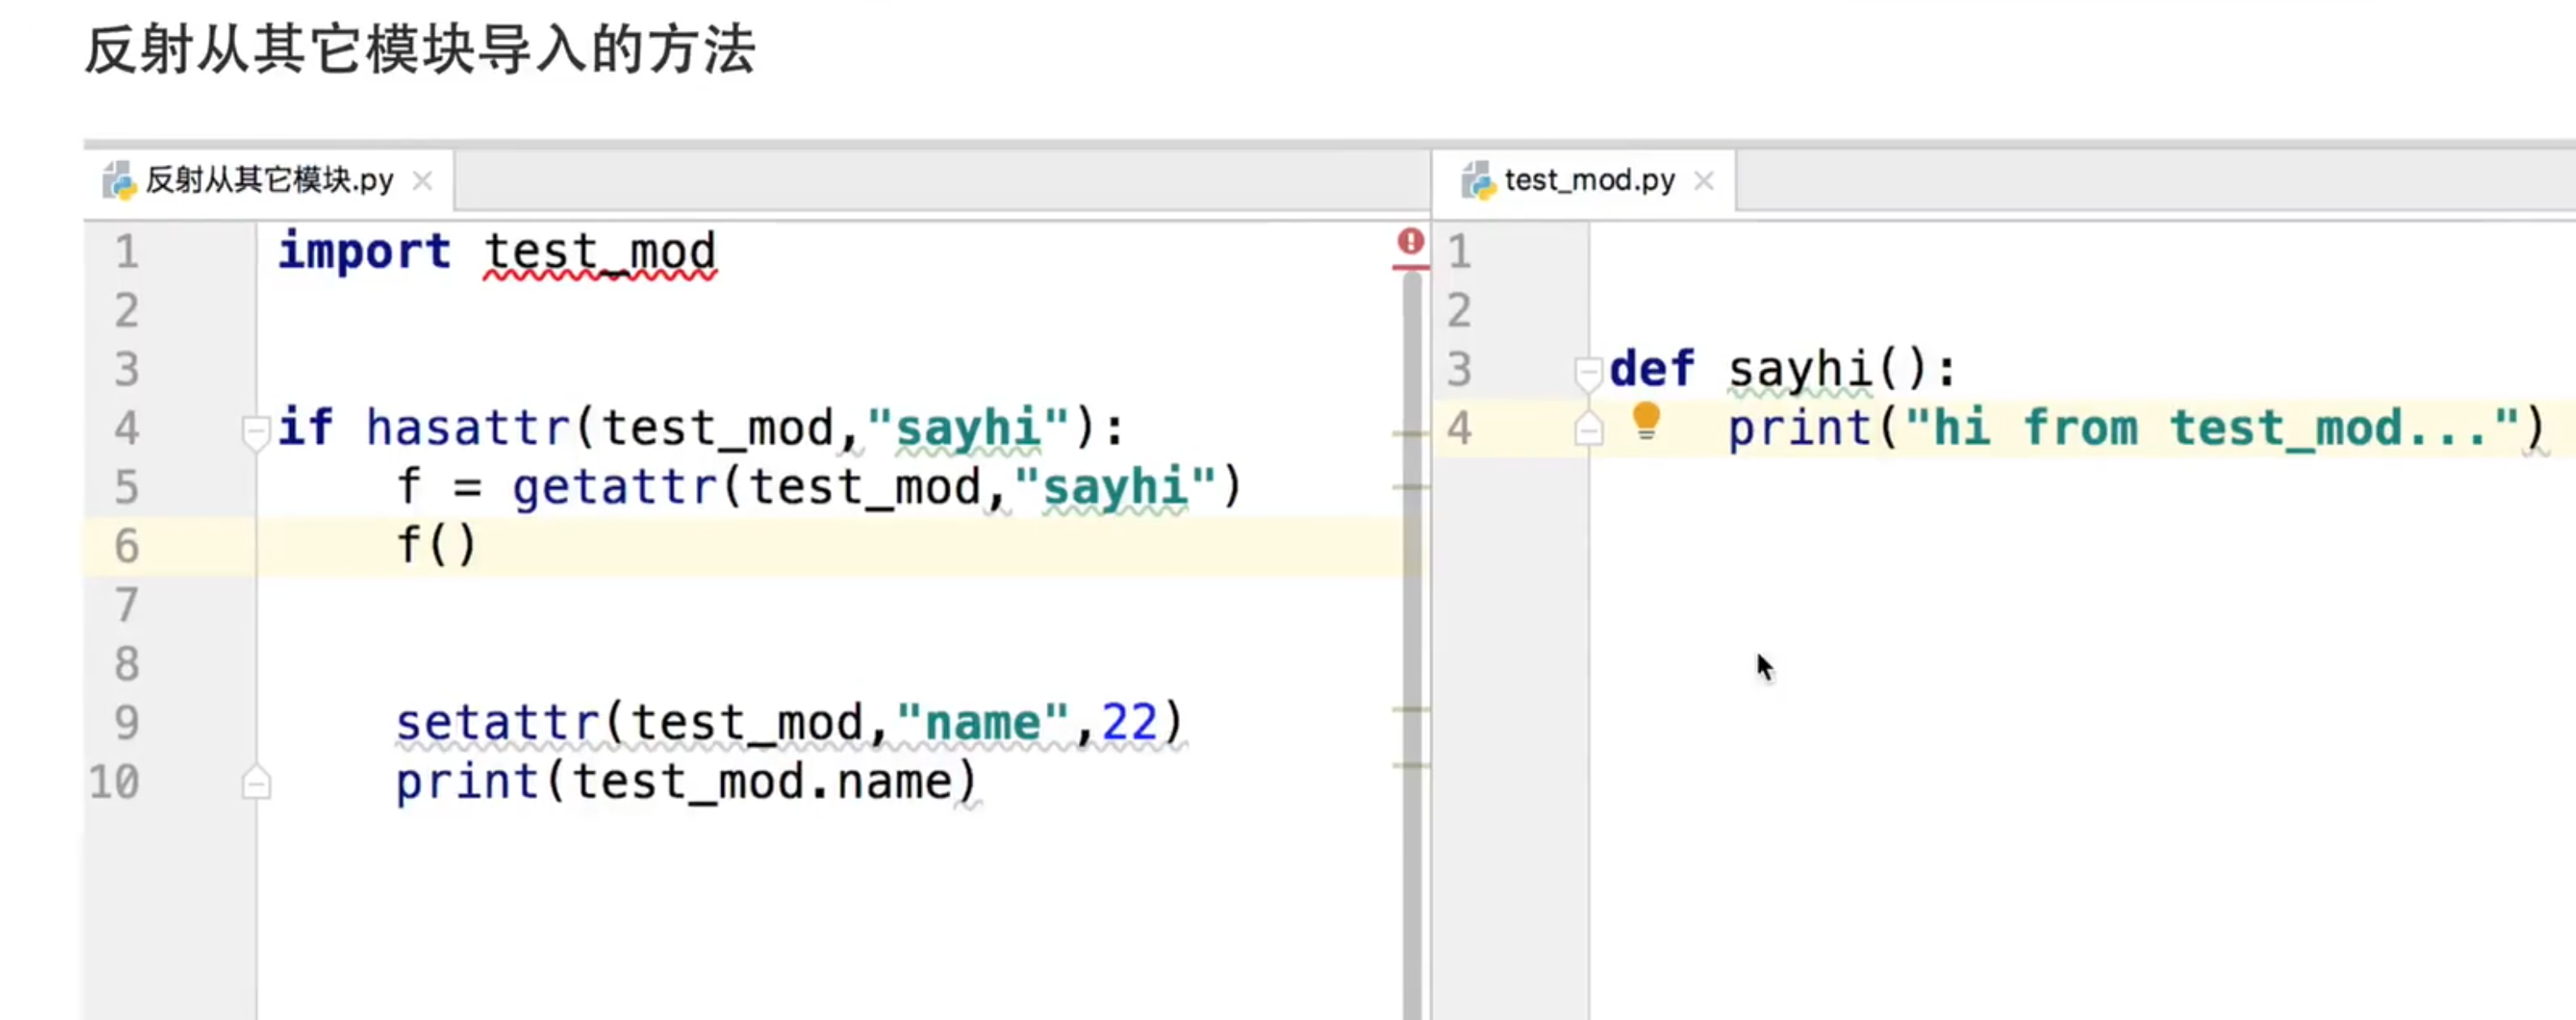